<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Core Trends Survey Analysis</h1>
<h2 style="font-family:Arial;">Group 3</h2>
<h2 style="font-family:Arial;">Rubar Demirbag (13568670)<br>Yu Ching Cheng (14008041)<br>Joseph Hanna (13245966)</h2>
<p><small> 37373 Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Autumn 2023</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract

The following notebook investigates trends between the demographic characteristics of adults in the United States (such as their income, gender, and age) against their technology usage. As a larger proportion of individuals take technologies such as the internet and smartphone for granted, it is important to identify those that go without, and analyse possible causes of their current living conditions and day-to-day difficulties.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>1. Motivation and Contribution</h1>

People and technology are becoming more intwined every day. As we become increasingly dependent on our devices and the internet to conduct day-to-day tasks, those without access to such services are at risk of becoming significantly disadvantaged. This was particularly true during the covid lockdowns (which occurred at the time this survey was completed), where individuals without internet access were strictly limited in how they could communicate with the outside world.

To promote equality of opportunity in our society, it is important to recognise why certain individuals are unable to access widespread technologies and examine how it impacts their lives. This report examines the 2021 Core Trends Survey by Pew Research Centre to uncover these exact reasons and impacts. 

As an additional topic of interest, our increasing dependency on technology has also allowed social media’s influence on public discourse to rise massively. It is critical to identify the online habits of individuals to investigate how this influence arose.

The report was constructed in a collaborative manner by all group members:
* Data preparation was a collaborative effort.
* Rubar Demirbag completed section 4.1, which analyses social media usage among interviewees.
* Joseph Hanna completed section 4.2, which analyses internet and TV access and attempts to uncover why certain groups go without.
* Yu Ching Cheng completed section 4.3, which analyses relationships between demographic characteristics and connects results to prior analysis.


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>2. The data</h1>

The 2021 Core Trends Survey by Pew Research Centre (https://www.pewresearch.org/internet/dataset/2021-core-trends-survey/) contains data on technology access and social media usage for approximately 1500 adults in the United States. This dataset is particularly special and unique as it also collects contextual data about the individual, such as their age, gender, and income.

The dataset’s impressive span of 88 columns enables us to create intricate links between technology usage and demographic characteristics, which is the exact goal of our study. As the dataset contains no personally identifiable information (PII), it is publicly accessible and can be freely shared.

The dataset file (directly accessible from this link: https://www.pewresearch.org/internet/wp-content/uploads/sites/9/2022/05/Jan-25-Feb-8-2021-Core-Trends-Survey.zip) contains several documents which explain each column in the CSV dataset. These explanations are used to translate the encoded data into human-readable form for easier analysis (see Section 3).

<b>Note:</b> We renamed the csv file to "Core Trends Survey.csv" before performing the below analysis.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Data preparation</h1>

First, let's import everything we will need for data preparation.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

Loading CSV:

In [2]:
input_file = Path("Core Trends Survey.csv")
cts_raw_data = pd.read_csv(input_file, sep=",", header=0, index_col=0,
                           parse_dates=["int_date"], keep_default_na=False, na_values=[' '])
# Provide a view into column names and size of dataset
display(list(cts_raw_data.columns[10:15]))
display(cts_raw_data.shape)

['intmob', 'intfreq', 'snsint2', 'home4nw', 'bbhome1']

(1502, 88)

Certain columns don't have an appropriate data type. Let's fix that.

In [3]:
#First get all columns with float type instead of int
float_finder = cts_raw_data.dtypes == 'float64'
float_finder = float_finder[float_finder].keys().tolist()
#Now convert them (no 0's exist in the data, so can fill NA values with them. These will be dealt with appropriately later)
cts_raw_data[float_finder] = cts_raw_data[float_finder].fillna(0).astype(int)


Notice that a lot of columns aren't named well. Many of these need renaming to better indicate their meaning.

Additionally, column values are coded according to the survey specifications. These need to be made human-readable.

The meaning behind each column (and column values) can be found in the MS Word files included in the dataset package (link provided in Section 2). Where necessary, additional reasoning can also be found in the inline code comments below.

In [4]:
#To prevent repetitive code, similarly coded responses will call to the same dictionary.

#Since dict.update() returns nothing, to make some of the below dictionaries in one line of code,
#need the below method.
def update_dictionary(old_dictionary, updated_entries):
    old_dictionary.update(updated_entries)
    return old_dictionary

lack_of_response = {
    0: None, #Taking care of those 0s introduced earlier!
    8: "Unsure",
    9: 'Refused'
}

alternate_lack_of_response = {
    0: None,
    98: "Unsure",
    99: 'Refused'
}

yes_no_response = update_dictionary({ 
    1: 'Yes',
    2: 'No',
}, lack_of_response)

frequency_response = update_dictionary({
    1: 'Constantly',
    2: 'Several times a day',
    3: 'Once a day',
    4: 'Several times a week',
    5: 'Less often',
}, lack_of_response)

app_frequency_response = update_dictionary({
    1: 'Several times a day',
    2: 'Once a day',
    3: 'Few times a week',
    4: 'Every few weeks',
    5: 'Less often'
}, lack_of_response)

disadvantage_response = update_dictionary({
    1: 'Major disadvantage',
    2: 'Minor disadvantage',
    3: 'No disadvantage'
}, lack_of_response)

race_response = update_dictionary({
    1: 'White',
    2: 'Black',
    3: 'Asian',
    4: 'Other',
    5: 'Native American',
    6: 'Pacific Islander',
    7: 'Hispanic'
}, lack_of_response)

family_size_response = {
    0: 'Refused',
    8: '>8',
    9: 'Refused'
}

Let's first make column values human-readable. Annoyingly, the encoding is not consistent so each column will need to be dealt with separately.

If this dataset was larger, the below code would be done as part of post-processing to save memory space and improve computational speed. In this case, the performance impact of applying this to the whole dataset is minimal.

In [5]:
cts_data = cts_raw_data.replace({
    'eminuse': yes_no_response,
    'intmob': yes_no_response,
    'intfreq': frequency_response,
    'snsint2': yes_no_response,
    'home4nw': yes_no_response,
    'bbhome1': update_dictionary({1: 'Dial-up', 
                2: 'Higher-speed', 
                3: 'Both dial-up and higher-speed', 
                4: 'Internet only through mobile device',
                5: 'No home internet access'}, lack_of_response),
    'bbhome2': update_dictionary({1: 'Dial-up',
                2: 'Higher-speed'}, lack_of_response),
    'device1a': yes_no_response,
    'smart2': yes_no_response,
    'bbsmart2': yes_no_response,
    'bbsmart3a': yes_no_response,
    'bbsmart3b': yes_no_response,
    'bbsmart3c': yes_no_response,
    'bbsmart3d': yes_no_response,
    'bbsmart3e': yes_no_response,
    'bbsmart3f': yes_no_response,
    'bbsmart4': update_dictionary({1: 'Monthly cost of home subscription is too expensive',
                 2: 'Cost of computer is too expensive',
                 3: 'Smartphone does everything online that you need to do',
                 4: 'Other options for internet access outside of home',
                 5: 'Broadband is not available where you live or is too slow',
                 6: 'Other reason'}, lack_of_response),
    'cable1': yes_no_response,
    'cable2': yes_no_response,
    'cable3a': yes_no_response,
    'cable3b': yes_no_response,
    'cable3c': yes_no_response,
    'web1a': yes_no_response,
    'web1a': yes_no_response,
    'web1b': yes_no_response,
    'web1c': yes_no_response,
    'web1d': yes_no_response,
    'web1e': yes_no_response,
    'web1f': yes_no_response,
    'web1g': yes_no_response,
    'web1h': yes_no_response,
    'web1i': yes_no_response,
    'web1j': yes_no_response,
    'web1k': yes_no_response,
    'sns2a': app_frequency_response,
    'sns2b': app_frequency_response,
    'sns2c': app_frequency_response,
    'sns2d': app_frequency_response,
    'sns2e': app_frequency_response,
    'paya': yes_no_response,
    'payb': yes_no_response,
    'payc': yes_no_response,
    'prob': update_dictionary({1: 'Often',
             2: 'Sometimes',
             3: 'Rarely',
             4: 'Never'}, lack_of_response),
    'coviddisa': disadvantage_response,
    'coviddisb': disadvantage_response,
    'coviddisc': disadvantage_response,
    'coviddisd': disadvantage_response,
    'coviddise': disadvantage_response,
    'device1b': yes_no_response,
    'device1c': yes_no_response,
    'device1d': yes_no_response,
    'books1': update_dictionary({97: '97+'}, alternate_lack_of_response),
    'books2a': yes_no_response,
    'books2b': yes_no_response,
    'books2c': yes_no_response,
    'gender': update_dictionary({1: 'Male',
               2: 'Female',
               3: 'Other'}, lack_of_response),
    'age': update_dictionary({97: '97+'}, alternate_lack_of_response),
    'marital': update_dictionary({1: 'Married',
                2: 'Living with a partner',
                3: 'Divorced',
                4: 'Separated',
                5: 'Widowed',
                6: 'Never been married'}, lack_of_response),
    'par': yes_no_response,
    'educ2': update_dictionary({1: 'Less than high school',
              2: 'High school incomplete',
              3: 'High school graduate',
              4: 'Some college education, no degree',
              5: 'Two-year associate degree',
              6: "Four-year college or university degree/Bachelor's degree",
              7: "Some postgraduate or professional schooling, no postgraduate degree",
              8: "Postgraduate or professional degree (Master's, Doctorate)"}, alternate_lack_of_response),
    'emplnw': update_dictionary({1: 'Full time',
               2: 'Part time',
               3: 'Retired',
               4: 'Not employed for pay',
               5: 'Self-employed',
               6: 'Disabled',
               7: 'Student',
               8: 'Other'}, alternate_lack_of_response),
    'disa': yes_no_response,
    'hisp': yes_no_response,
    'racem1': race_response,
    'racem2': race_response,
    'racem3': race_response,
    'racem4': race_response,
    'racecmb': race_response,
    'birth_hisp': update_dictionary({1: 'U.S.',
                   2: 'Puerto Rico',
                   3: 'Another country'}, lack_of_response),
    'income': update_dictionary({1: '<$10,000',
            2: 'Between $10,000 & $20,000',
            3: 'Between $20,000 & $30,000',
            4: 'Between $30,000 & $40,000',
            5: 'Between $40,000 & $50,000',
            6: 'Between $50,000 & $75,000',
            7: 'Between $75,000 & $100,000',
            8: 'Between $100,000 & $150,000',
            9: '>$150,000',
            10: 'Refused' #This key wasn't provided in the specification, but is present in the data. Will interpret it as 'Refused'.
            }, alternate_lack_of_response),
    'party': update_dictionary({1: 'Republican',
              2: 'Democrat',
              3: 'Independent',
              4: 'No preference',
              5: 'Other'}, lack_of_response),
    'hh1': family_size_response,
    'hh3': family_size_response
})

In [6]:
cts_data = cts_data.rename(columns =
                    {
                        'int_date': 'interview_date',
                        'eminuse': 'use_internet_or_email',
                        'intmob': 'use_internet_on_mobile_device',
                        'intfreq': 'frequency_of_internet_use',
                        'snsint2': 'use_social_media',
                        'home4nw': 'subscribe_internet_at_home',
                        'bbhome1': 'internet_at_home_type',
                        'bbhome2': 'use_dial_up_at_home',
                        'device1a': 'have_cell_phone',
                        'smart2': 'is_phone_smartphone', #follow up on previous question on cell phone possession
                        'bbsmart2': 'interested_in_high_speed_internet',
                        'bbsmart3a': 'bb_reason_expensive', #bbsmart3x questions are different reasons for lack of high speed internet at home
                        'bbsmart3b': 'bb_reason_computer_expensive',
                        'bbsmart3c': 'bb_reason_smartphone_does_everything',
                        'bbsmart3d': 'bb_reason_have_other_internet_access_options',
                        'bbsmart3e': 'bb_reason_broadband_not_available_or_slow',
                        'bbsmart3f': 'bb_reason_other',
                        'bbsmart3f_1_other': 'bb_reason_other_explanation',
                        'bbsmart4': 'bb_reason_most_important', #most important reason out of all those mentioned above
                        'cable1': 'television_access',
                        'cable2': 'television_access_in_past',
                        'cable3a': 'tv_reason_dont_watch_tv', #cable3x questions provide different reasons for lack of tv access
                        'cable3b': 'tv_reason_expensive',
                        'cable3c': 'tv_reason_watch_online',
                        'web1a': 'use_twitter', #web1x covers use of various social media apps
                        'web1b': 'use_instagram',
                        'web1c': 'use_facebook',
                        'web1d': 'use_snapchat',
                        'web1e': 'use_youtube',
                        'web1f': 'use_whatsapp',
                        'web1g': 'use_pinterest',
                        'web1h': 'use_linkedin',
                        'web1i': 'use_reddit',
                        'web1j': 'use_tiktok',
                        'web1k': 'use_nextdoor',
                        'sns2a': 'use_frequency_twitter', #sns2x covers frequency of social media use
                        'sns2b': 'use_frequency_instagram',
                        'sns2c': 'use_frequency_facebook',
                        'sns2d': 'use_frequency_snapchat',
                        'sns2e': 'use_frequency_youtube',
                        'paya': 'covid_pay_difficulty_cell_phone', #payx covers during pandemic, where there any difficulties paying for said service
                        'payb': 'covid_pay_difficulty_internet_at_home',
                        'payc': 'covid_pay_difficulty_tv',
                        'prob': 'frequency_home_internet_problems',
                        'coviddisa': 'opinion_no_internet_during_covid_difficult_getting_news', #purely an opinion based question from survey, "do you THINK" people have difficulty doing said task without internet during covid 
                        'coviddisb': 'opinion_no_internet_during_covid_difficult_contacting_others',
                        'coviddisc': 'opinion_no_internet_during_covid_difficult_finding_jobs',
                        'coviddisd': 'opinion_no_internet_during_covid_difficult_schoolwork',
                        'coviddise': 'opinion_no_internet_during_covid_difficult_medical_help',
                        'device1b': 'have_tablet', #device1x covers type of devices owned
                        'device1c': 'have_desktop_or_laptop',
                        'device1d': 'have_game_console',
                        'books1': 'how_many_books_read_past_year', #includes books partially read
                        'books2a': 'read_books_printed', #books2x covers the type of books read in past year
                        'books2b': 'read_books_audiobooks',
                        'books2c': 'read_books_ebooks',
                        'party': 'political_preference',
                        'marital': 'marital_status',
                        'par': 'parent_or_guardian',
                        'educ2': 'highest_level_of_schooling_completed',
                        'emplnw': 'employment_status',
                        'disa': 'disability_status',
                        'hisp': 'hispanic_latino_or_spanish',
                        'birth_hisp': 'hispanic_birthplace', #birthplace if hispanic
                        'income': 'income_before_taxes',
                        'hh1': 'num_people_in_household',
                        'hh3': 'num_adults_in_household' #number of people in household over 18 years of age
                    })

Now we need to remove and condense some columns for one or more of the following reasons:
1. The column has no use in our analysis.
2. The column is a duplicate of another column.
3. The column can be merged with other columns.
4. The column is encoded and can't be decoded (i.e. the `state` column)

In [7]:
#Removing columns
cts_data.drop(columns=['sample', 'comp', 'lang', 'state', 
                       'density', 'usr', 'qs1', 'sex',
                       'ql1', 'ql1a', 'qc1', 'weight', 'cellweight', 'partyln'], inplace=True)

#Making a column with merged results (need to remove duplicates and take care of null values, etc)
cts_data['race'] = cts_data[['racem1', 'racem2', 'racem3', 'racem4', 'racecmb']].apply(lambda races: ", ".join(set(race for race in races.values if race)), axis=1)

#Now drop the columns that have been merged
cts_data.drop(columns=['racem1', 'racem2', 'racem3', 'racem4', 'racecmb'], inplace=True)

That's all the major restructuring done! Let's take a quick look at some of the rows to make sure everything is present.

In [8]:
pd.set_option("display.max_columns", None)
cts_data.head(2)

,interview_date,use_internet_or_email,use_internet_on_mobile_device,frequency_of_internet_use,use_social_media,subscribe_internet_at_home,internet_at_home_type,use_dial_up_at_home,have_cell_phone,is_phone_smartphone,interested_in_high_speed_internet,bb_reason_expensive,bb_reason_computer_expensive,bb_reason_smartphone_does_everything,bb_reason_have_other_internet_access_options,bb_reason_broadband_not_available_or_slow,bb_reason_other,bb_reason_other_explanation,bb_reason_most_important,television_access,television_access_in_past,tv_reason_dont_watch_tv,tv_reason_expensive,tv_reason_watch_online,use_twitter,use_instagram,use_facebook,use_snapchat,use_youtube,use_whatsapp,use_pinterest,use_linkedin,use_reddit,use_tiktok,use_nextdoor,use_frequency_twitter,use_frequency_instagram,use_frequency_facebook,use_frequency_snapchat,use_frequency_youtube,covid_pay_difficulty_cell_phone,covid_pay_difficulty_internet_at_home,covid_pay_difficulty_tv,frequency_home_internet_problems,opinion_no_internet_during_covid_difficult_getting_news,opinion_no_internet_during_covid_difficult_contacting_others,opinion_no_internet_during_covid_difficult_finding_jobs,opinion_no_internet_during_covid_difficult_schoolwork,opinion_no_internet_during_covid_difficult_medical_help,have_tablet,have_desktop_or_laptop,have_game_console,how_many_books_read_past_year,read_books_printed,read_books_audiobooks,read_books_ebooks,gender,age,marital_status,parent_or_guardian,highest_level_of_schooling_completed,employment_status,disability_status,hispanic_latino_or_spanish,hispanic_birthplace,income_before_taxes,political_preference,num_people_in_household,num_adults_in_household,race
respid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
798,2021-01-26,Yes,Yes,Once a day,No,Yes,Higher-speed,None,Yes,No,None,None,None,None,None,None,None,NaN,None,Yes,None,None,None,None,No,No,No,No,No,No,No,No,No,No,No,None,None,None,None,None,No,No,No,Rarely,Minor disadvantage,Minor disadvantage,Major disadvantage,Major disadvantage,Minor disadvantage,Yes,Yes,No,50,Yes,No,No,Female,77,Widowed,No,"Some college education, no degree",Retired,Yes,No,None,"Between $50,000 & $75,000",Democrat,1,Refused,White
1017,2021-01-25,Yes,Yes,Several times a day,Yes,Yes,Higher-speed,None,Yes,Yes,None,None,None,None,None,None,None,NaN,None,Yes,None,None,None,None,No,No,Yes,No,Yes,No,No,No,No,No,No,None,None,Several times a day,None,Few times a week,No,No,No,Sometimes,Minor disadvantage,Minor disadvantage,Minor disadvantage,Minor disadvantage,Minor disadvantage,No,No,No,1,Yes,No,No,Male,59,Never been married,No,High school graduate,Part time,No,No,None,"Between $40,000 & $50,000",Republican,2,2,White


Before we move on, some quick checks on duplicates and null rows:

In [9]:
print(cts_data[cts_data.duplicated()].count().sum())

0


No duplicates! Now check if any rows have ALL null values. If so, will remove them.

In [10]:
#Just seeing if rows with ALL null exist first
print(cts_data.dropna(how='all').shape[0] - cts_data.shape[0])

0


No empty rows! We can now safely work with this dataset.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>4. Exploratory data analysis</h1>

First, let's import additional libraries needed for analysis.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

Let's also introduce some reusable utility functions that will come in handy.

In [12]:
def utility_extract_social_media_names(raw_name):
    if isinstance(raw_name, str):
        return re.sub('(.*_+)', '', raw_name).capitalize()
    else:
        return raw_name.str.replace(r'(.*_+)', '').map(lambda name: name.capitalize())
    
def utility_extract_reason_category(raw_cat):
    cat = re.sub('(^.*_reason_)|', '', raw_cat).capitalize()
    return re.sub('_', ' ', cat)

# As value '97+' exists in data, want to still consider this in analysis.
def utility_extract_numbers_from_string_column(column):
    column_int = column.replace('97+', '97')
    column_int = column_int[column_int.apply(lambda x: str(x).isnumeric())]
    return column_int.astype(int)

def utility_truncate_long_name(long_name, max_len):
    long_name = str(long_name)
    return long_name if len(long_name) <= max_len else f'{long_name[:max_len]}...'

def utility_plot_multiple_graphs(nrows, ncol, figsize, rows_of_interest, columns_of_interest, suptitle, exclusion_columns=[]):
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncol, figsize=figsize)
    # Flatten the axes array to easily iterate over the subplots
    axes = axes.flatten()

    # Iterate over the columns and create subplots
    i = 0
    for col in columns_of_interest:
        try: 
            if col not in exclusion_columns:
                counts_of_interest = rows_of_interest[col].value_counts().sort_values()
                # Create a bar plot for each  column
                sns.barplot(y=[utility_truncate_long_name(name,20) for name in counts_of_interest.index], x=counts_of_interest.values, ax=axes[i], orient='h')
                axes[i].set_ylabel('')
                axes[i].set_title(col.capitalize().replace('_', ' '))
                i += 1
        except:
            print(f'Column {col} has no values!')
            continue

    plt.suptitle(suptitle)
    plt.tight_layout()
    # Display the plot
    plt.show()

<h3>4.1 Analysis: Social Media Usage Trends Among Interviewees</h3>

The following section will explore the use of social media among interviewees. First, we will identify what proportion of interviewees use social media.

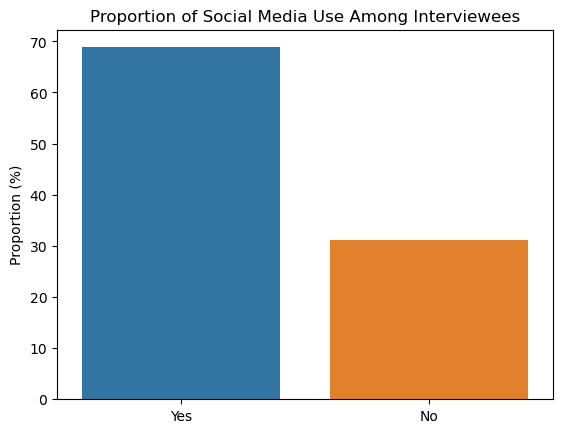

In [13]:
percentage_data = cts_data['use_social_media'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_data.index, y=percentage_data.values)

# Set the y-axis label to '%'
plt.ylabel('Proportion (%)')

# Set the title of the plot
plt.title('Proportion of Social Media Use Among Interviewees')

# Display the plot
plt.show()

We can see that almost 70% of interviewees actively use social media. This is quite a big group, making it possible to complete further analysis.

We will create a bar plot to identify the proportion of interviewees using various social media platforms. Each bar represents a different platform; including Twitter, Instagram, Facebook, Snapchat, YouTube, WhatsApp, Pinterest, LinkedIn, Reddit, TikTok, and Nextdoor.

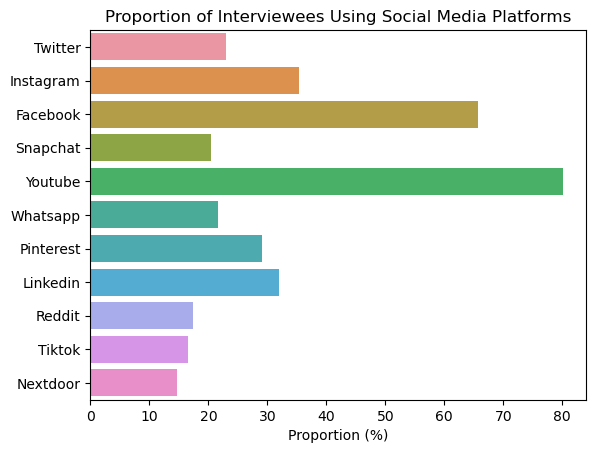

In [14]:
# Select the relevant columns
social_media_cols = ['use_twitter', 'use_instagram', 'use_facebook', 'use_snapchat', 'use_youtube',
                     'use_whatsapp', 'use_pinterest', 'use_linkedin', 'use_reddit', 'use_tiktok', 'use_nextdoor']

# Calculate the proportions for each social media platform
platform_proportions = cts_data[social_media_cols].apply(lambda col: col.value_counts(normalize=True) * 100).loc['Yes']

# Create a bar plot using Seaborn
sns.barplot(x=platform_proportions.values, y=utility_extract_social_media_names(platform_proportions.index), orient='h')

plt.xlabel('Proportion (%)')
# Set the title of the plot
plt.title('Proportion of Interviewees Using Social Media Platforms')

# Display the plot
plt.show()

Facebook and Youtube are clearly the most popular platforms. Now let's take things a step further and analyse the frequency of social media usage for each platform.

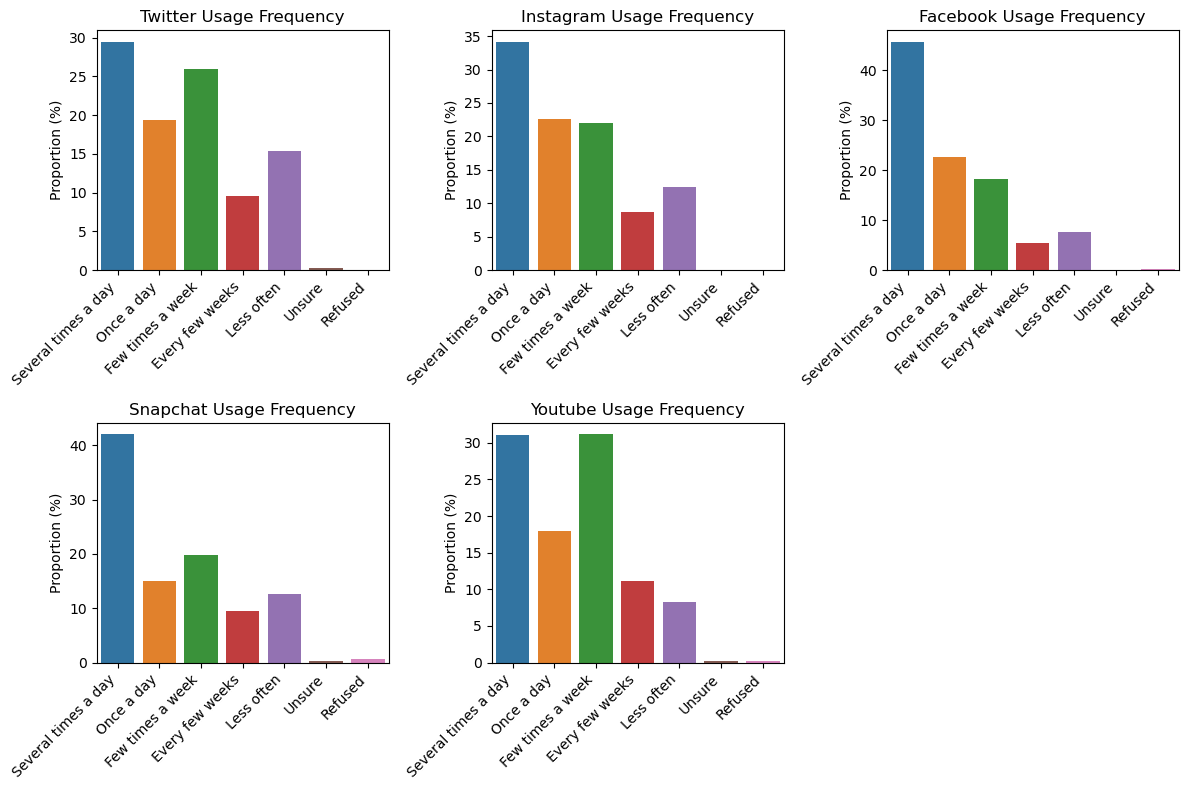

In [15]:
# Select the relevant columns
frequency_cols = ['use_frequency_twitter', 'use_frequency_instagram', 'use_frequency_facebook',
                  'use_frequency_snapchat', 'use_frequency_youtube']
# Set the order of columns in each plot for consistency
order = ['Several times a day', 'Once a day', 'Few times a week', 'Every few weeks',
            'Less often', "Unsure", 'Refused']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over the columns and create subplots
for i, col in enumerate(frequency_cols):
    # Calculate the proportions for each frequency category
    frequency_proportions = cts_data[col].value_counts(normalize=True) * 100
    # Create a bar plot for each frequency column
    sns.barplot(x=frequency_proportions.index, y=frequency_proportions.values, ax=axes[i], order=order)
    # Rotate x-axis labels by 45 degrees
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    # Set the y-axis label to '%'
    axes[i].set_ylabel('Proportion (%)')
    # Set the title of each subplot
    axes[i].set_title(f'{utility_extract_social_media_names(col)} Usage Frequency')

#Removing empty plots from grid
for ax in axes[len(frequency_cols):]:
    ax.remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

We can see that people who use social media are very active, being more likely to access it daily than not.

Let's get a better idea about how many different social media platforms interviewees use.

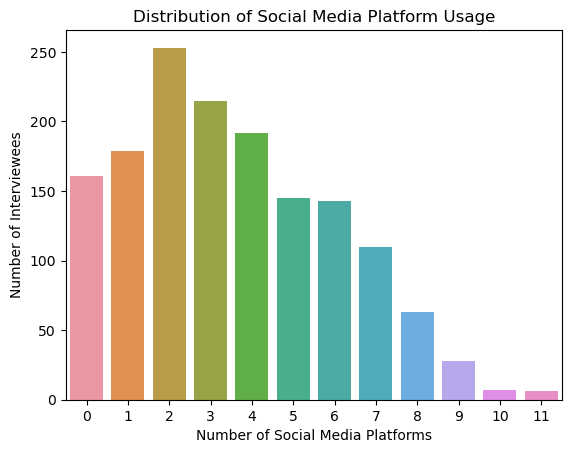

Mean number of platforms: 3.56


In [16]:
# Count the number of social media platforms used by each interviewee
num_social_media = cts_data[social_media_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# Count the occurrences of each number of social media platforms
num_platform_counts = num_social_media.value_counts().sort_index()

# Create a bar plot using Seaborn
sns.barplot(x=num_platform_counts.index, y=num_platform_counts.values)

# Set the x-axis label to 'Number of Social Media Platforms'
plt.xlabel('Number of Social Media Platforms')

# Set the y-axis label to 'Number of Interviewees'
plt.ylabel('Number of Interviewees')

# Set the title of the plot
plt.title('Distribution of Social Media Platform Usage')

# Display the plot
plt.show()

# Also show the mean
print(f"Mean number of platforms: {round(num_social_media.mean(), 2)}")

There's clearly a lot of online activity among those that use social media platforms. Our interviewees use an average of 3.5 platforms, each of which are most likely to be used (at least) daily.

We shall now investigate if there is a correlation between specific demographics and social media use. First let's examine gender.

In [17]:
# Calculate the number of social media users by gender
gender_counts = cts_data.groupby(['gender', 'use_social_media']).size().unstack()
display(gender_counts)

use_social_media,No,Yes
gender,,
Female,151,477
Male,306,548
Other,2,6
Refused,7,2
Unsure,2,1


We can see that males and females differ somewhat. It's worth investigating their proportions. Let's also remove the <code>Refused</code> and <code>Unsure</code> categories since their counts are negligble.

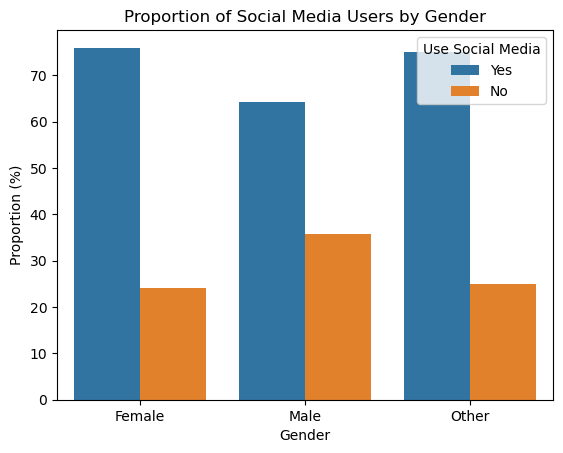

In [18]:
# Create proportionality dataset by gender
gender_proportions = cts_data.groupby('gender')['use_social_media'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
# Removing refused and unsure categories
gender_proportions = gender_proportions[gender_proportions['gender'].isin(['Female', 'Male', 'Other'])]

# Plotting proportion of social media use by gender
sns.barplot(x='gender', y='percent', hue='use_social_media', data=gender_proportions)
plt.legend(title='Use Social Media')
plt.title('Proportion of Social Media Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion (%)')
plt.show()

Males are approximately 10% less likely to use social media than females. Other genders seem to have similar usage proportions to females (but note that very few samples were counted for this category).

Let's see if there's any patterns involving age.

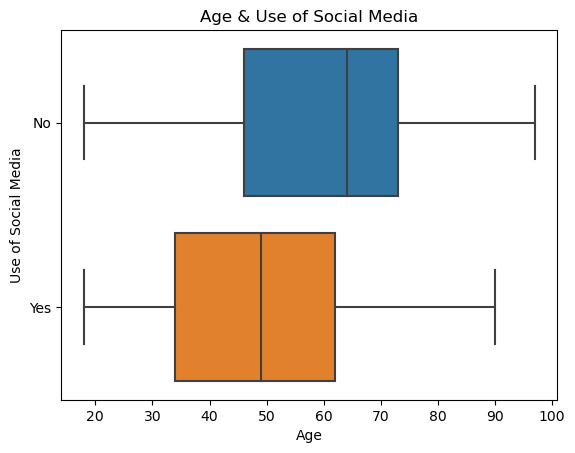

In [19]:
# Ensure '97+' is considered in analysis (will just interpret person's age as being 97)
# (non-numerical values exist to indicate that the person's age is '97+', no specific age is recorded beyond this value)
cts_data_numeric_age = cts_data[['age', 'use_social_media']]
cts_data_numeric_age['age'] = utility_extract_numbers_from_string_column(cts_data['age'])

# Create subplots for age and use_social_media relationship (with numerical values only)
sns.boxplot(x='age', y='use_social_media', data=cts_data_numeric_age)
plt.xlabel('Age')
plt.ylabel('Use of Social Media')
plt.title('Age & Use of Social Media')
plt.show()

The median age of individuals that don't use social media is approximately 12 years higher than those that do. More surprisingly, people of all ages exist under both categories. 

On another note, perhaps its also worth determining if book readers are likely to use social media.

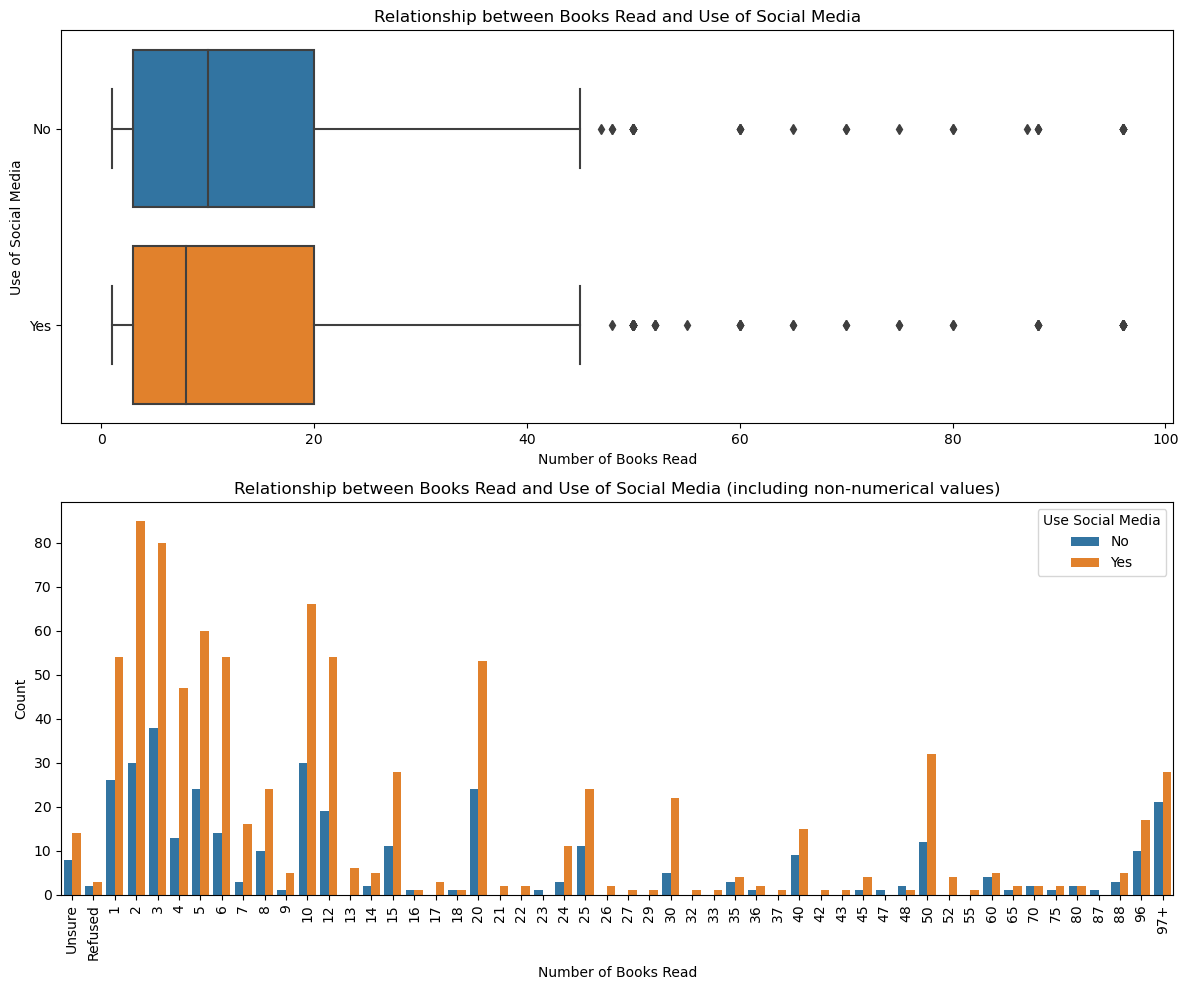

In [20]:
# Define the desired order of x-axis labels
x_axis_order = ["Unsure", 'Refused'] + sorted(
    [int(value) for value in cts_data['how_many_books_read_past_year'].unique()
     if isinstance(value, int)]) + ['97+']

# Create a copy of the DataFrame with relevant columns
data_subset = cts_data[['how_many_books_read_past_year', 'use_social_media']].copy()

# Remove rows with non-numerical values in the 'how_many_books_read_past_year' column
data_subset_numeric = data_subset[data_subset['how_many_books_read_past_year'].apply(lambda x: str(x).isnumeric())]
data_subset_numeric['how_many_books_read_past_year'] = data_subset_numeric['how_many_books_read_past_year'].astype(int)

# Create subplots for 'how_many_books_read_past_year' and use_social_media relationship
plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
sns.boxplot(x='how_many_books_read_past_year', y='use_social_media', data=data_subset_numeric)
plt.xlabel('Number of Books Read')
plt.ylabel('Use of Social Media')
plt.title('Relationship between Books Read and Use of Social Media')

# Create subplots for 'how_many_books_read_past_year' and use_social_media relationship (including non-numerical values)
plt.subplot(2, 1, 2)
sns.countplot(x='how_many_books_read_past_year', hue='use_social_media', data=data_subset, order=x_axis_order)
plt.legend(title='Use Social Media')
plt.xlabel('Number of Books Read')
plt.ylabel('Count')
plt.title('Relationship between Books Read and Use of Social Media (including non-numerical values)')

# Rotate x-axis labels for better visibility in the count plot
plt.xticks(rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Surprisingly, book reading behaviour is very similar between those that do and don't use social media. While the bar chart shows higher peaks for social media users, this is just because most (~70%) people are grouped in that category. Proportionally, the heights would be similar. 

Finally, let's determine if a person's income has any impact on their social media usage.

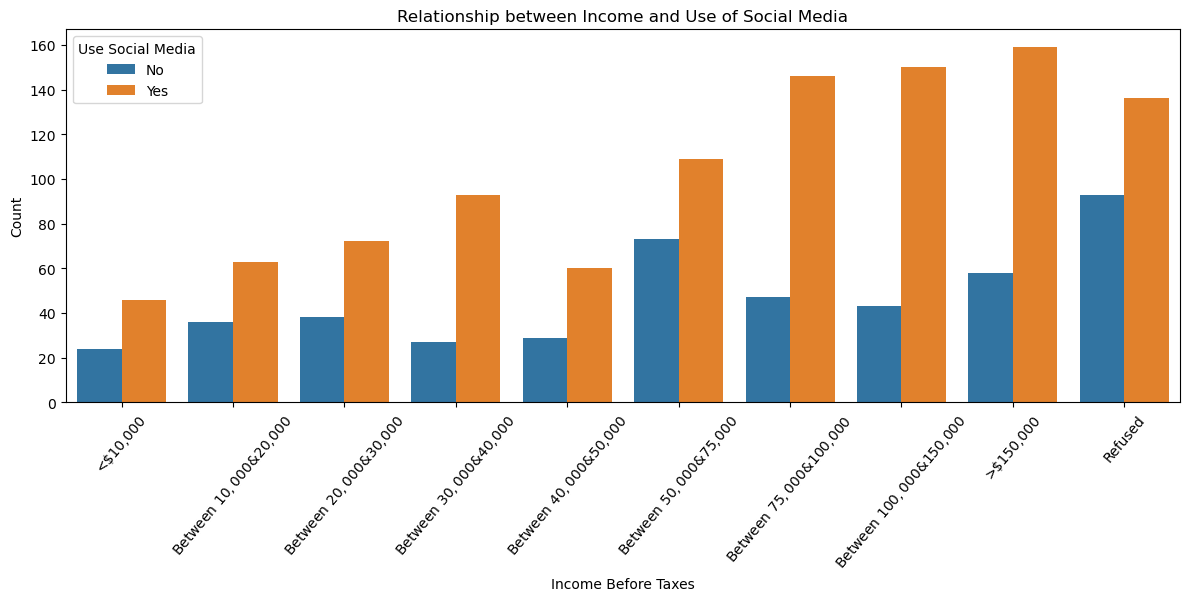

In [21]:
# Define the desired order of x-axis labels 
x_axis_order = ['<$10,000', 'Between $10,000 & $20,000', 'Between $20,000 & $30,000',
                'Between $30,000 & $40,000', 'Between $40,000 & $50,000',
                'Between $50,000 & $75,000', 'Between $75,000 & $100,000',
                'Between $100,000 & $150,000', '>$150,000', 'Refused']

plt.figure(figsize=(12, 10))
# Create subplots for 'income_before_taxes' and use_social_media relationship
plt.subplot(2, 1, 1)
sns.countplot(x='income_before_taxes', hue='use_social_media', data=cts_data, order=x_axis_order)
plt.xlabel('Income Before Taxes')
plt.ylabel('Count')
plt.legend(title='Use Social Media')
plt.title('Relationship between Income and Use of Social Media')
plt.xticks(rotation=50)  # Rotate x-axis labels by 45 degrees

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The 75,000 - 150,000 income range has the greatest disparity between social media users and non-users. But there are significantly more social media users in all income groups.

Maybe there are differences in the apps used between these groups too.

<Figure size 1200x800 with 0 Axes>

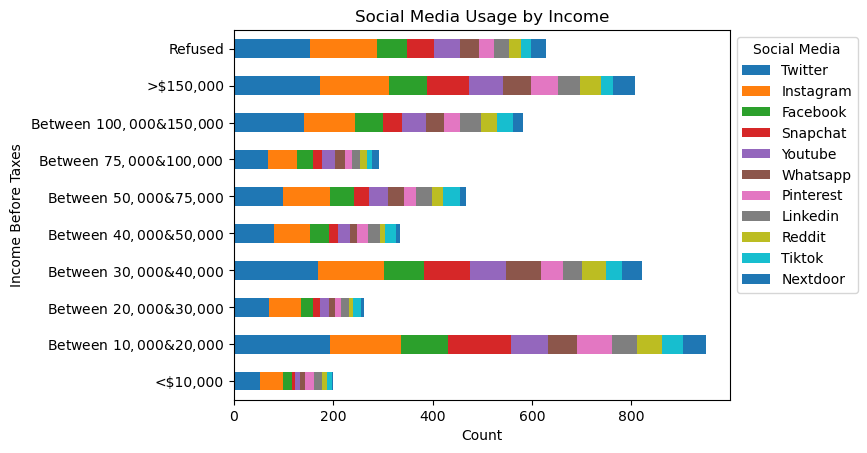

In [22]:
# Select the relevant columns for analysis
social_media_cols = ['use_twitter', 'use_instagram', 'use_facebook', 'use_snapchat', 'use_youtube',
                     'use_whatsapp', 'use_pinterest', 'use_linkedin', 'use_reddit', 'use_tiktok', 'use_nextdoor']
data_subset = cts_data[['income_before_taxes'] + social_media_cols].copy()

# Melt the DataFrame to convert social media columns into a single column
data_melted = pd.melt(data_subset, id_vars=['income_before_taxes'], value_vars=social_media_cols,
                      var_name='Social Media', value_name='Usage')

# Filter out rows with 'No' usage
data_filtered = data_melted[data_melted['Usage'] == 'Yes']

# Group the data by income and social media, and calculate the count
grouped_data = data_filtered.groupby(['income_before_taxes', 'Social Media']).size().unstack()

# Reorder the columns based on social media popularity
social_media_popularity = grouped_data.sum().sort_values(ascending=False).index
grouped_data = grouped_data[social_media_popularity]

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='barh', stacked=True)

# Set labels and title
plt.ylabel('Income Before Taxes')
plt.xlabel('Count')
plt.title('Social Media Usage by Income')

# Set x-axis labels and rotate them for better readability
plt.yticks(range(len(x_axis_order)), x_axis_order)
plt.legend(title='Social Media', 
           labels=[utility_extract_social_media_names(social_media) for social_media in social_media_cols], 
           bbox_to_anchor=(1, 1))
plt.show()

Surprisingly, social media app choices are pretty consistent among all income groups. Notice however that the app counts per group do not reflect the size trends in the previous graph; each person in the 10,000 - 20,000 income group must use multiple social media apps (on average).

Perhaps this is because individuals in that income group are quite young and tech savvy?

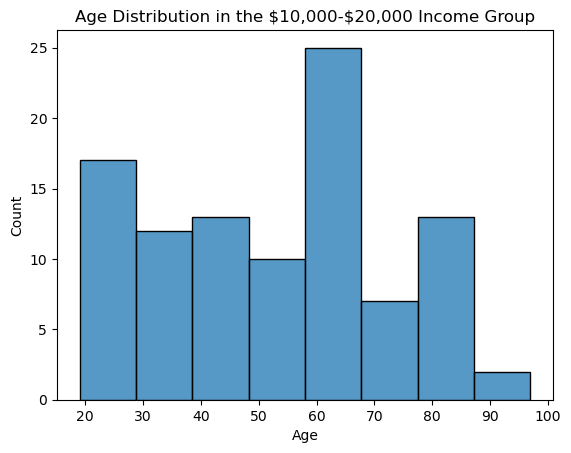

In [23]:
# Let's first get age into numeric form (for reasons explained earlier)
cts_data_numeric_age = cts_data[['income_before_taxes', 'age', 'employment_status']]
cts_data_numeric_age['age'] = utility_extract_numbers_from_string_column(cts_data['age'])
values = cts_data_numeric_age[cts_data_numeric_age['income_before_taxes']=="Between $10,000 & $20,000"]['age']

# Now plot a histogram
sns.histplot(data=cts_data_numeric_age, x=values)
plt.title("Age Distribution in the \$10,000-\$20,000 Income Group")
plt.xlabel('Age')
plt.show()

So this group is predominantly made up of those in their sixties. This went against expectations but makes sense; those that are retired would have more time to use social media apps. Perhaps the younger groups also have a lot of time on their hands due to their current employment status.

In [24]:
# Getting all required features from desired income group
income_group = cts_data_numeric_age[cts_data_numeric_age['income_before_taxes']=="Between $10,000 & $20,000"]
# Organising features into bins
age_labels = pd.cut(income_group['age'], np.arange(18, 108, 10))
inc_emp_table = income_group.groupby([age_labels, 'employment_status']).size().unstack()
# Appending total row to table
inc_emp_table.loc[inc_emp_table.shape[0]] = inc_emp_table.sum().transpose()
#Adding 'total' label to total row
inc_emp_table.rename(index={8: 'Total'}, inplace=True)
display(inc_emp_table)

employment_status,Disabled,Full time,Not employed for pay,Part time,Retired,Self-employed,Student
age,,,,,,,
"(18, 28]",0,7,4,4,0,1,1
"(28, 38]",1,3,4,4,0,0,0
"(38, 48]",2,4,3,3,1,0,0
"(48, 58]",2,2,1,3,2,1,0
"(58, 68]",4,3,3,3,11,1,0
"(68, 78]",0,0,0,0,7,0,0
"(78, 88]",0,0,1,0,12,0,0
"(88, 98]",0,0,0,0,1,0,0
Total,9,19,16,17,34,3,1


As suspected quite a few are retired. A large proportion also work part-time or are simply not employed for pay. Some also don't work due to disability limitations. As so many are not working full time, this group would have time to indulge on their social media use.

<h3>4.2 Analysis: Internet and TV Usage</h3>

Let's see if there's any correlations between internet usage at home and personal characteristics. To create correlation matrices, we will refer raw dataset which contains integer encoded responses.

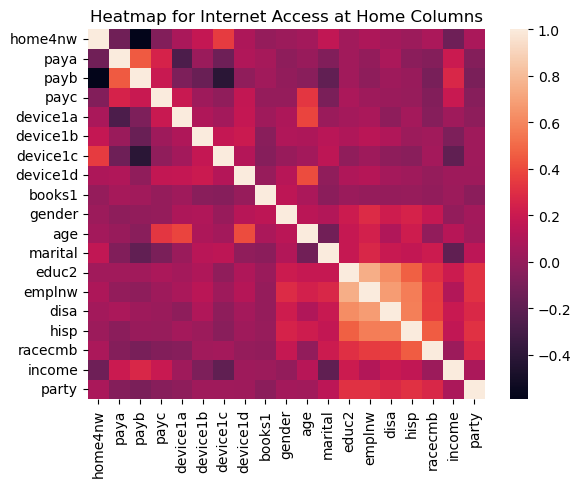

In [25]:
# List out all potential columns of interest.
demographic_columns_of_interest_rawdata = ['paya', 'payb', 'payc', 
                            'device1a', 'device1b', 'device1c', 'device1d', 'books1',
                            'gender', 'age', 'marital', 'educ2', 'emplnw', 
                            'disa', 'hisp', 'racecmb', 'income', 'party']

sns.heatmap(cts_raw_data[['home4nw'] + demographic_columns_of_interest_rawdata].corr())
plt.title("Heatmap for Internet Access at Home Columns")
plt.show()

Internet use (home4nw) seems to have significant inverse correlation to COVID related payment difficulties (payb). 

The dataset contains more information on why people don't use internet services at home, it would be worth uncovering each reason's prominence. 

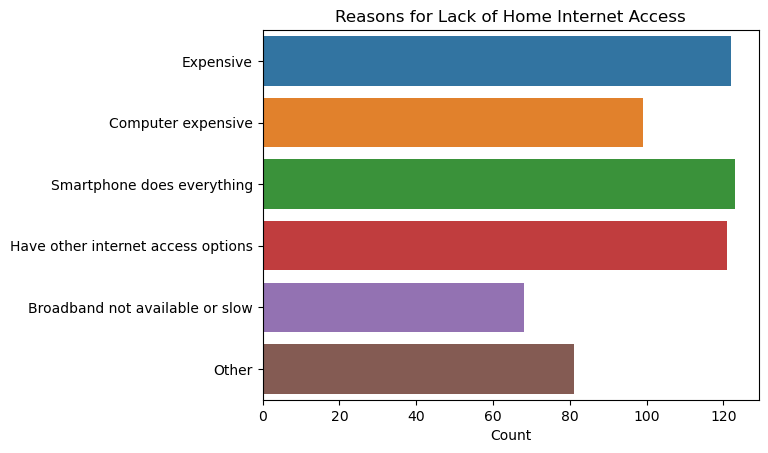

In [26]:
# Get all columns relating to lack of internet access.
no_internet_reason_columns = ['bb_reason_expensive', 'bb_reason_computer_expensive', 'bb_reason_smartphone_does_everything',
 'bb_reason_have_other_internet_access_options', 'bb_reason_broadband_not_available_or_slow', 'bb_reason_other']

# Get number of times that reason has been stated
reason_counts = cts_data[no_internet_reason_columns].apply(lambda col: col.value_counts()).loc['Yes']
# Create a bar plot
sns.barplot(x=reason_counts.values, y=[utility_extract_reason_category(cat) for cat in reason_counts.index], orient='h')
plt.xlabel('Count')
plt.title('Reasons for Lack of Home Internet Access')

# Display the plot
plt.show()

So it seems that cost and alternate access options (such as mobile networks) limit home internet usage.

It may be worth exploring what other reasons have been provided.

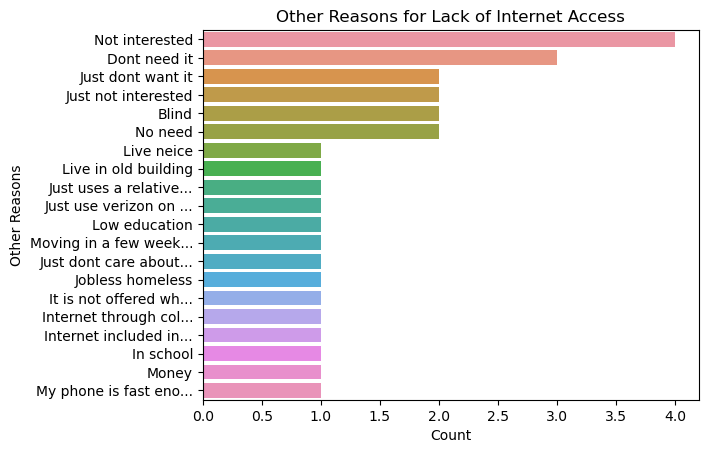

In [27]:
# Just list out the 50 most popular reasons
grouped_other = cts_data.groupby('bb_reason_other_explanation').size().sort_values(ascending=False)[:20]
sns.barplot(x=grouped_other.values, y=[utility_truncate_long_name(reason.strip().capitalize(), 20) for reason in grouped_other.index], orient='h')
plt.xlabel('Count')
plt.ylabel('Other Reasons')
plt.title('Other Reasons for Lack of Internet Access')

# Display the plot
plt.show()

By far the most popular reason in the 'other' category is simply a lack of interest towards the internet. Some others mention their disability and/or financial status as their main reason.

Are those that are not interested in a particular demographic group?

Sample size: 17


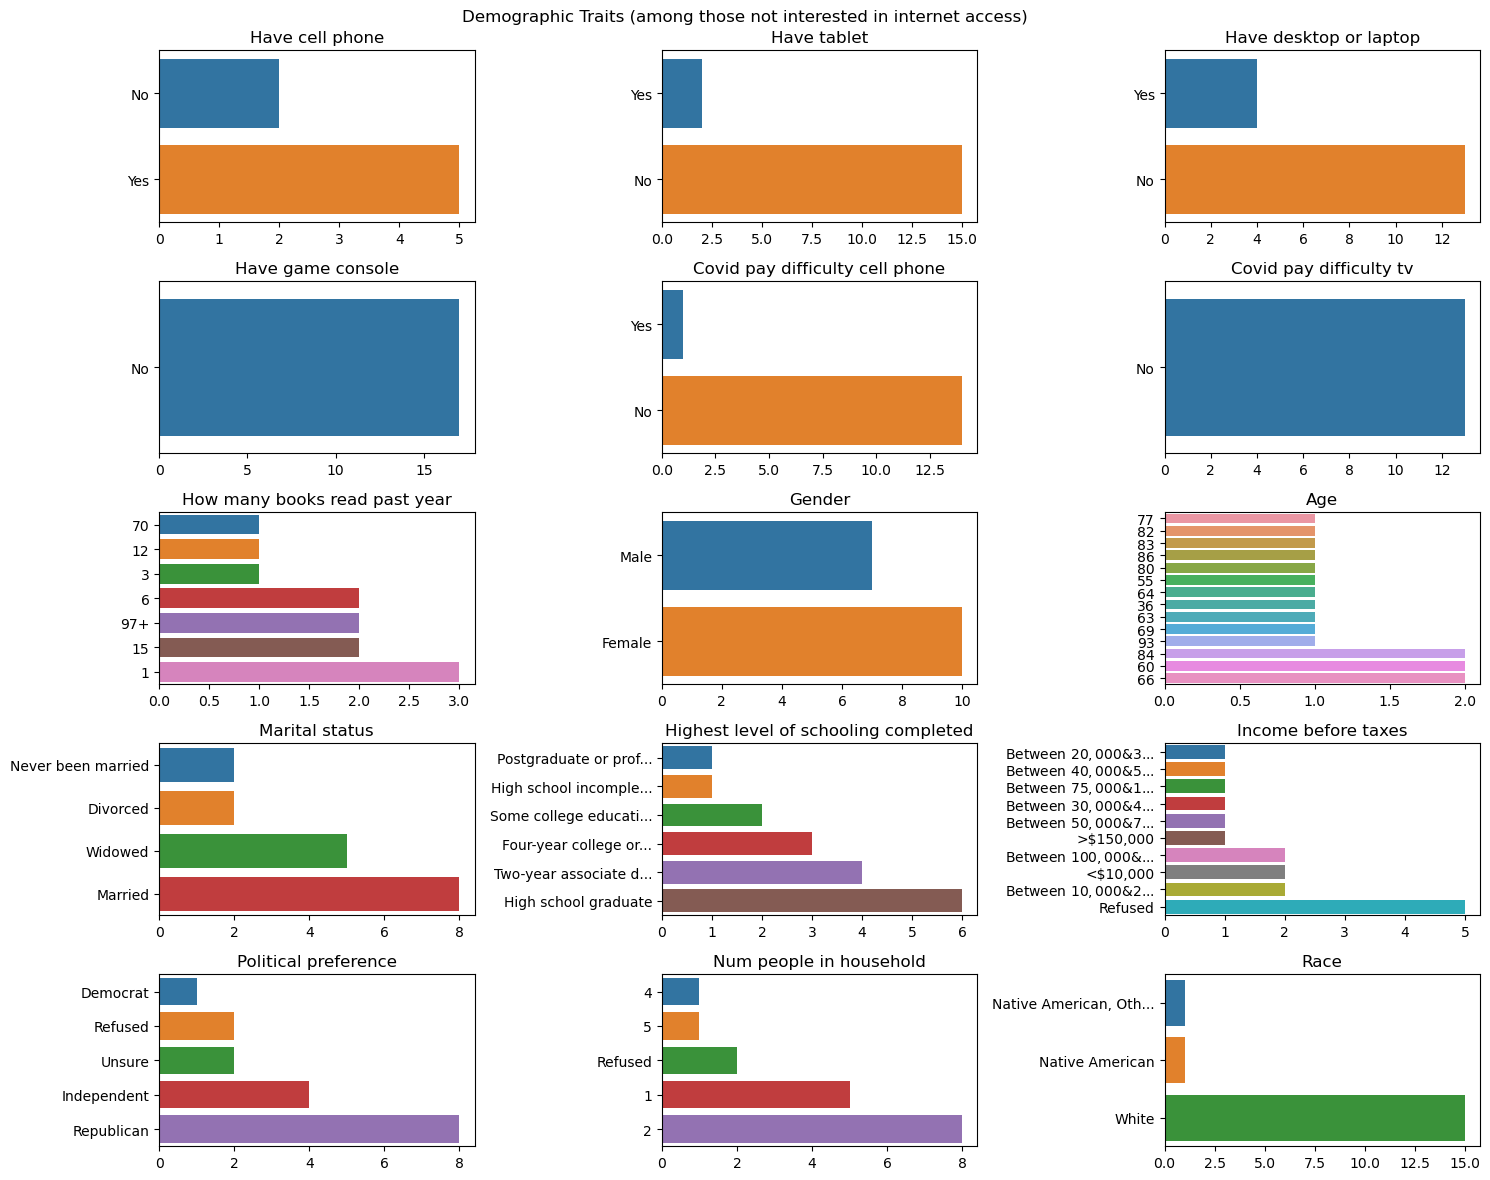

In [28]:
# Extracting rows where people are not interested
rows_of_interest = cts_data[cts_data['bb_reason_other_explanation'].str.contains('not interested|dont need|dont want|dont care').fillna(False)]

# Got the demographic columns of interest before, but need their cts_data versions instead
# Omitting column 'covid_pay_difficulty_internet_at_home' as this column is N/A for everybody in this group (as they don't have internet in the first place)
demographic_columns_of_interest = ['have_cell_phone', 
                                    'have_tablet', 'have_desktop_or_laptop', 'have_game_console', 
                                    'covid_pay_difficulty_cell_phone', 'covid_pay_difficulty_tv',
                                    'how_many_books_read_past_year', 'gender', 'age', 
                                    'marital_status', 'highest_level_of_schooling_completed', 'income_before_taxes', 
                                    'political_preference', 'num_people_in_household', 'race']

# Display the sample size
print(f'Sample size: {rows_of_interest.shape[0]}')

# Print graphs using utility method
utility_plot_multiple_graphs(5, 3, (15,12), rows_of_interest, demographic_columns_of_interest, "Demographic Traits (among those not interested in internet access)")

So those that aren't interested in internet access tend to have smartphones already (presumably with mobile network capability), and lack other electronic devices at home (such as a tablet, PC, or game console). They also don't tend to have payment difficulties in other areas. Ages vary significantly but nobody under the age of 36 exists in this group.

Other trends include non-internet users being predominantly Republican, married, white, and with two people in the household. Note that these trends should be taken with a grain of salt - it is based on a very small sample of 17 individuals (a testament to the internet's popularity, given that only 17 of approximately 1500 interviewees are not interested in it).

Going back a couple of steps, let's further analyse individuals where internet access is too expensive.

Sample size: 144


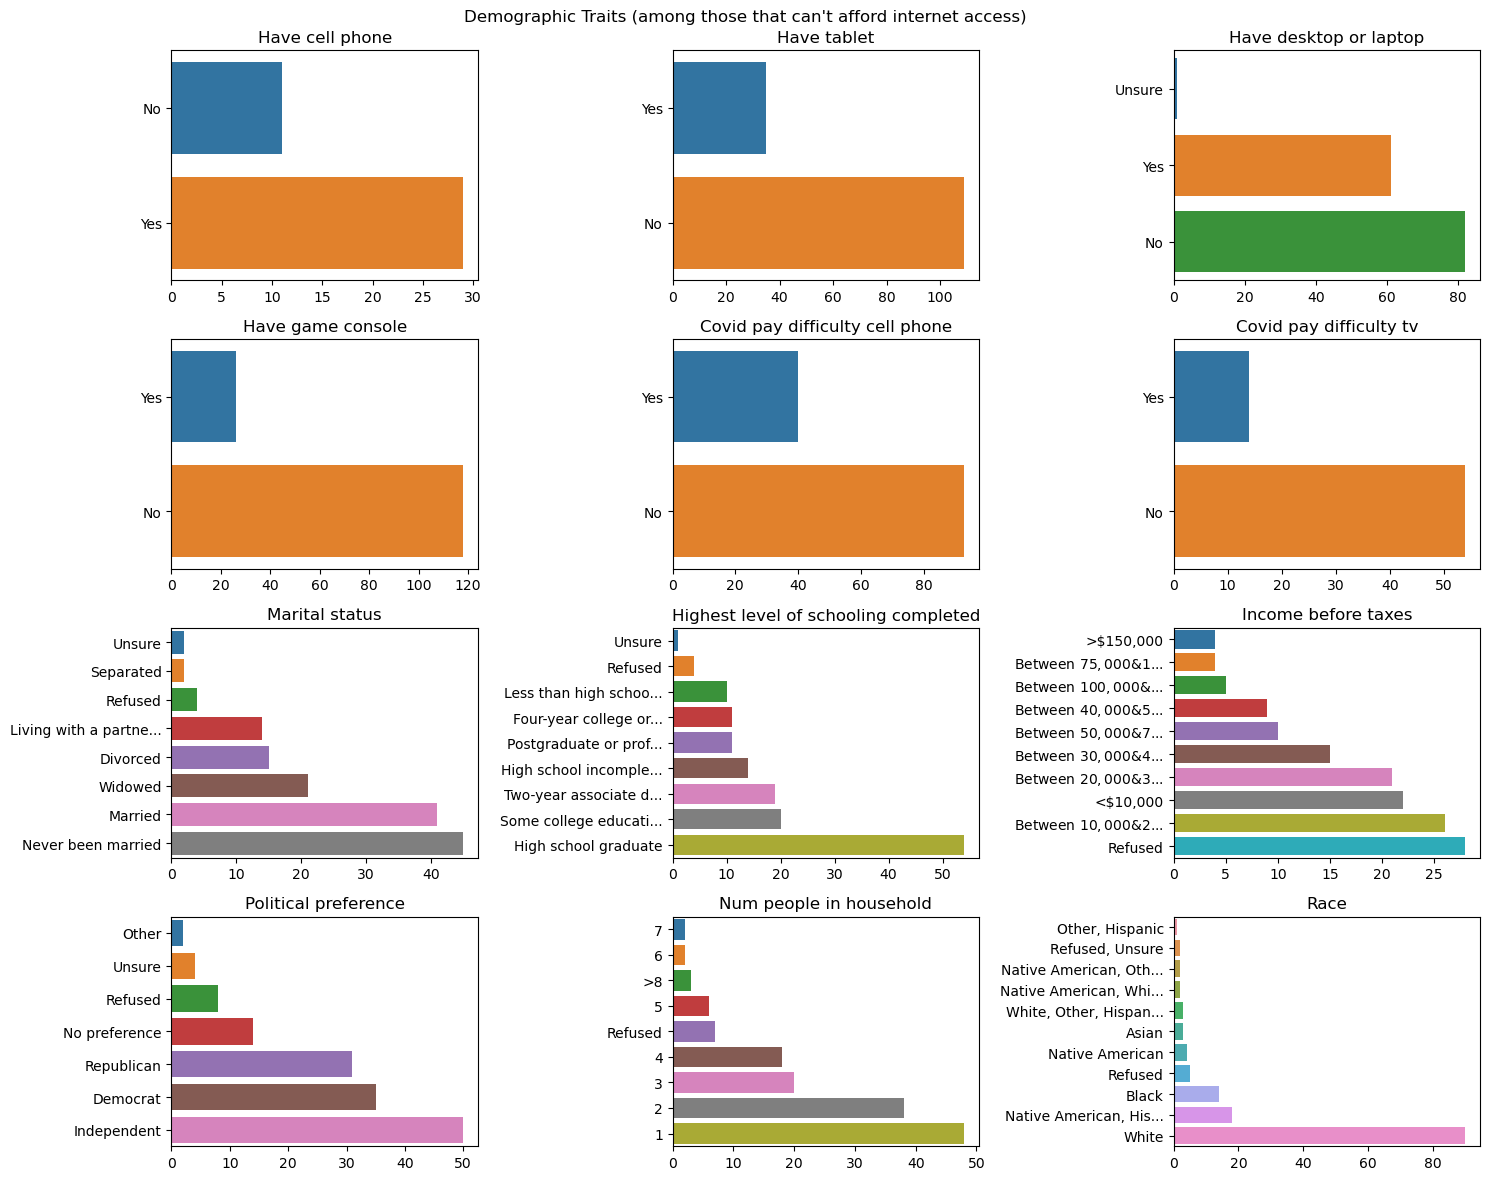

In [29]:
mask = cts_data['bb_reason_expensive'].str.contains('Yes') | cts_data['bb_reason_computer_expensive'].str.contains('Yes')
rows_of_interest = cts_data[mask]

# Don't want to plot these columns in this case
exclusion_columns = ['age', 'how_many_books_read_past_year', 'gender']

# Display the sample size
print(f'Sample size: {rows_of_interest.shape[0]}') 

# Print graphs using utility function
utility_plot_multiple_graphs(4, 3, (15,12), rows_of_interest, demographic_columns_of_interest, "Demographic Traits (among those that can't afford internet access)", exclusion_columns)

We can see that this group typically consists of people who have low income, are single, and live on their own. Are these people predominantly young? 

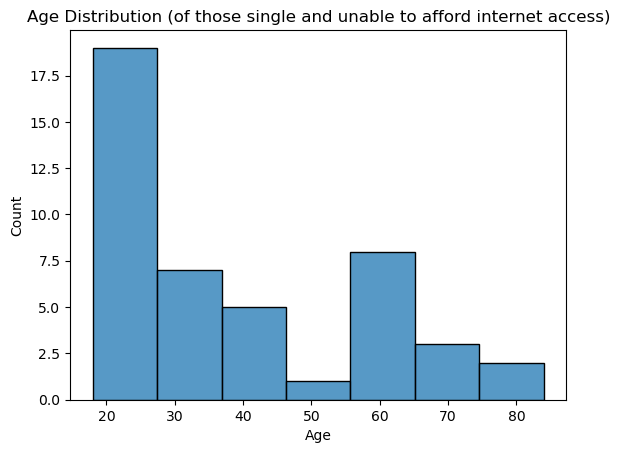

In [30]:
# Get people who are single and live on their own from the already refined group
mask = rows_of_interest['marital_status'].str.contains('Never been married') & rows_of_interest['num_people_in_household']==1
solo_rows_of_interest = rows_of_interest[mask]

# Graph their age
solo_rows_of_interest['age'] = utility_extract_numbers_from_string_column(solo_rows_of_interest['age'])

# Now plot a histogram
sns.histplot(data=solo_rows_of_interest, x=solo_rows_of_interest['age'])
plt.title("Age Distribution (of those single and unable to afford internet access)")
plt.xlabel('Age')
plt.show()

As suspected, they are predominantly young. However those that are of retired age also make up a decent portion of this group.

Let's investigate the employment status of people in this group by age.

In [31]:
# Organising features into bins
age_labels = pd.cut(solo_rows_of_interest['age'], np.arange(18, 108, 10))
emp_table = solo_rows_of_interest.groupby([age_labels, 'employment_status']).size().unstack()
# Appending total row to table
emp_table.loc[emp_table.shape[0]] = emp_table.sum().transpose()
#Adding 'total' label to total row
emp_table.rename(index={8: 'Total'}, inplace=True)
display(emp_table)

employment_status,Disabled,Full time,Not employed for pay,Part time,Retired,Self-employed,Student
age,,,,,,,
"(18, 28]",0,3,5,6,0,2,1
"(28, 38]",0,4,0,3,0,1,0
"(38, 48]",0,2,2,0,0,0,0
"(48, 58]",1,0,1,0,0,0,0
"(58, 68]",0,1,2,2,2,0,0
"(68, 78]",0,0,0,0,3,0,0
"(78, 88]",0,0,0,0,1,0,0
"(88, 98]",0,0,0,0,0,0,0
Total,1,10,10,11,6,3,1


Younger people in this group are mostly not employed or work part time. Those that are older tend to be retired. This complies with our previous assumptions on these groups.

Now we will focus on similar trends relating to TV usage. Like before, first we will see if there's any correlation with TV access and other demographic attributes.

Text(0.5, 1.0, 'Heatmap for Internet Access at Home Columns')

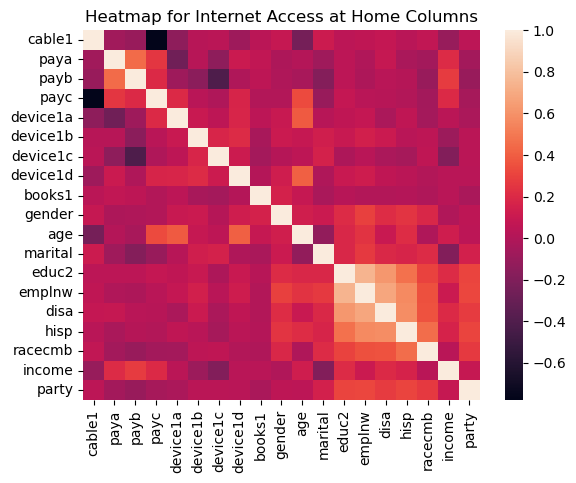

In [32]:
sns.heatmap(cts_raw_data[['cable1'] + demographic_columns_of_interest_rawdata].corr())
plt.title("Heatmap for Internet Access at Home Columns")

There is strong negative correlation between Cable TV access (cable1) and covid related payment difficulties for tv access (payc). This is exactly the same scenario as seen in the internet case.

Like before, there are some columns providing reasons for lack of Cable TV access.

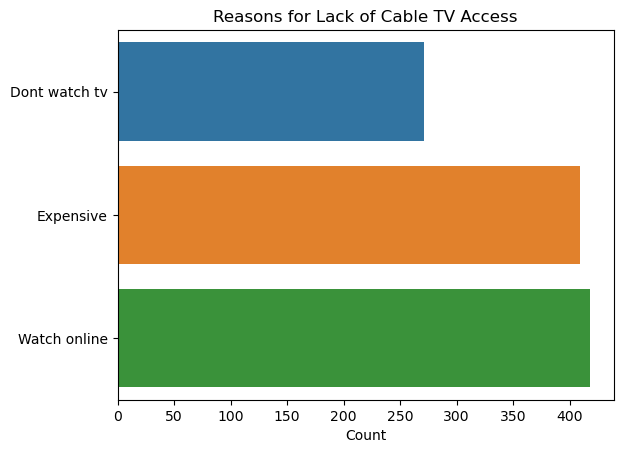

In [33]:
# Get all columns relating to lack of internet access.
no_tv_reason_columns = ['tv_reason_dont_watch_tv', 'tv_reason_expensive', 'tv_reason_watch_online']

# Get number of times that reason has been stated
reason_counts = cts_data[no_tv_reason_columns].apply(lambda col: col.value_counts()).loc['Yes']
# Create a bar plot
sns.barplot(x=reason_counts.values, y=[utility_extract_reason_category(cat) for cat in reason_counts.index], orient='h')
plt.xlabel('Count')
plt.title('Reasons for Lack of Cable TV Access')

# Display the plot
plt.show()

All three reasonings here are prominent. Cable TV is expensive and can be cheaply replaced nowadays by online alternatives - let's see if those that 'watch online' also provided 'expensive' as a reason.

In [34]:
# Get rows where both 'tv_reason_expensive' and 'tv_reason_watch_online' are yes.
online_and_expensive_mask = cts_data['tv_reason_expensive'].str.contains('Yes') & cts_data['tv_reason_watch_online'].str.contains('Yes')
# Get number of True values
true_online_and_expensive = online_and_expensive_mask.value_counts().values[1]
# Get reason count for those that consider TV expensive
true_expensive = reason_counts.values[1]

print(f"Proportion of users that answered 'expensive' that also watch online: {round((true_online_and_expensive/true_expensive)*100, 2)}%")

Proportion of users that answered 'expensive' that also watch online: 73.59%


This is a considerable proportion, showing that cable TV is experiencing intense competition from online mediums.

For the other ~30%, let's analyse their demographic traits and see if any clear trends appear.

Column covid_pay_difficulty_tv has no values!


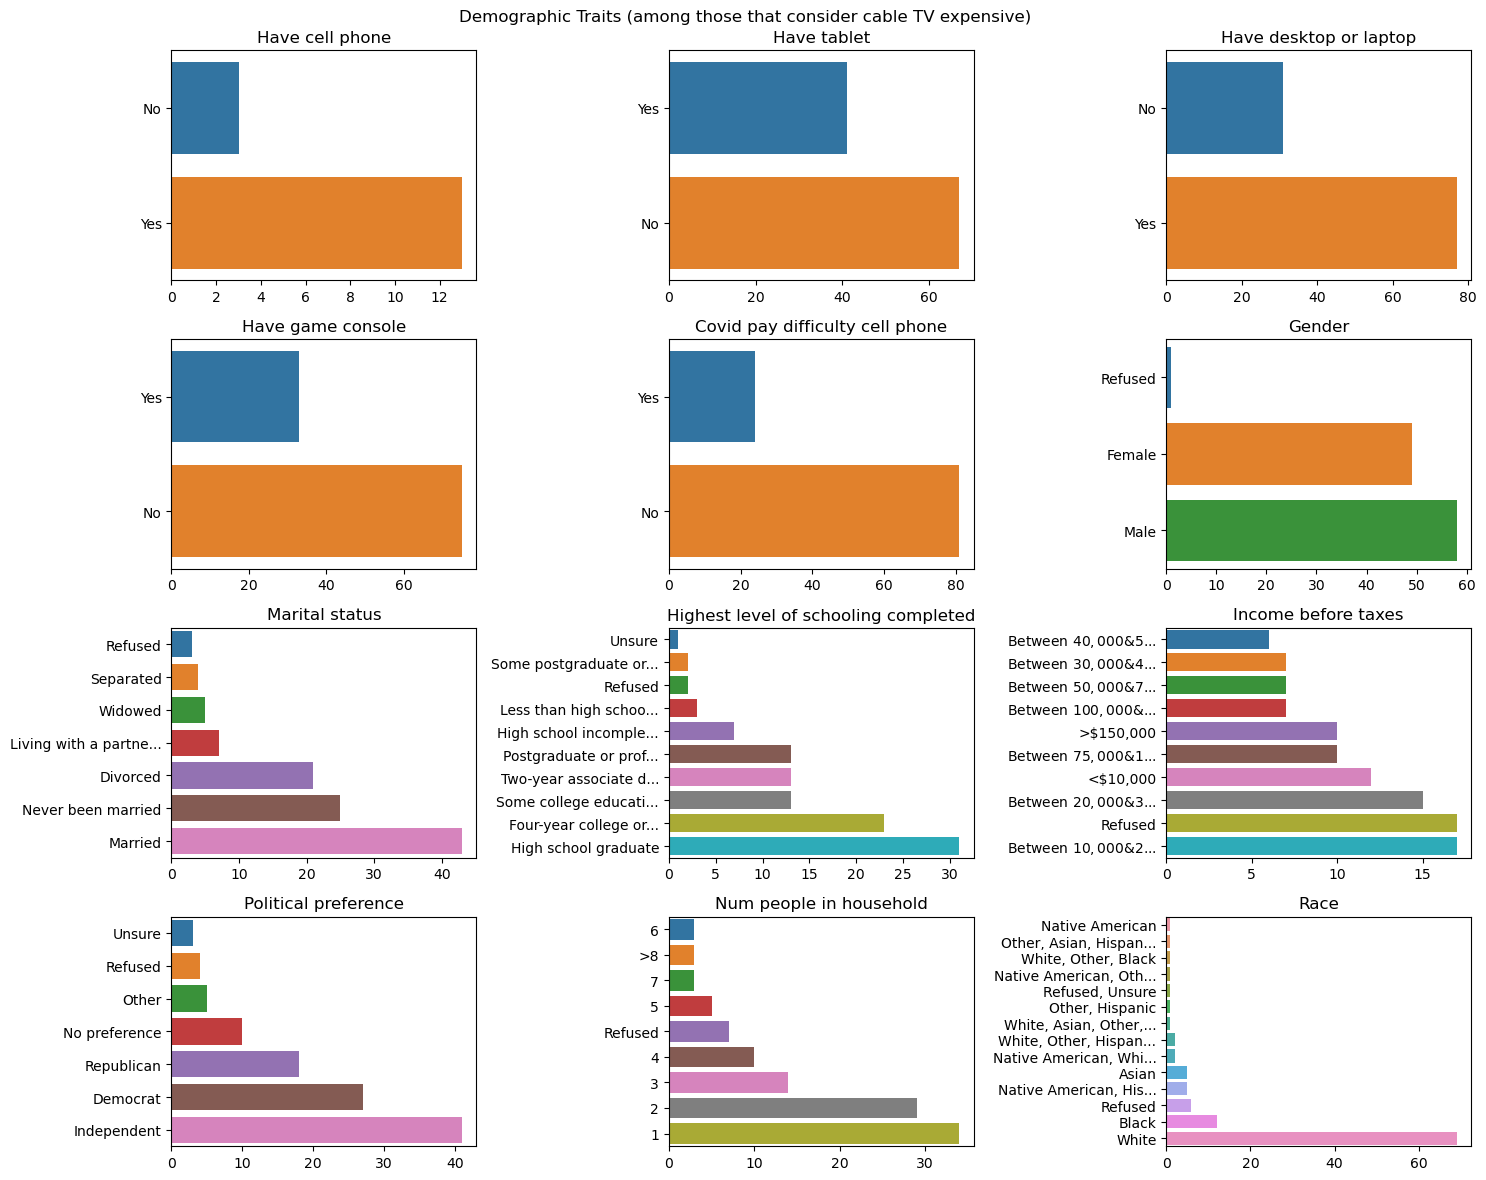

In [35]:
# Getting those that only selected expensive as a reason
expensive_only_mask = cts_data['tv_reason_expensive'].str.contains('Yes') & cts_data['tv_reason_watch_online'].str.contains('No')
expensive_only_rows = cts_data[expensive_only_mask]

utility_plot_multiple_graphs(4, 3, (15,12), expensive_only_rows, demographic_columns_of_interest, "Demographic Traits (among those that consider cable TV expensive)", ['age', 'how_many_books_read_past_year'])

Those that solely consider TV to be expensive predominantly have low income and live alone, similar to what was found when studying individuals without internet access. 

<h3>4.3 Analysis: Relationships between Personal Characteristics</h3>

As there are multiple columns in the dataset pertaining to contextual data (such as age and income), it is worth exploring links between these features. 

While these relationships do not focus on the main scope of the project, it may help us uncover some nuanced links to technology usage when combined with previous analysis.

First, let's look into relationship between income and marital status.

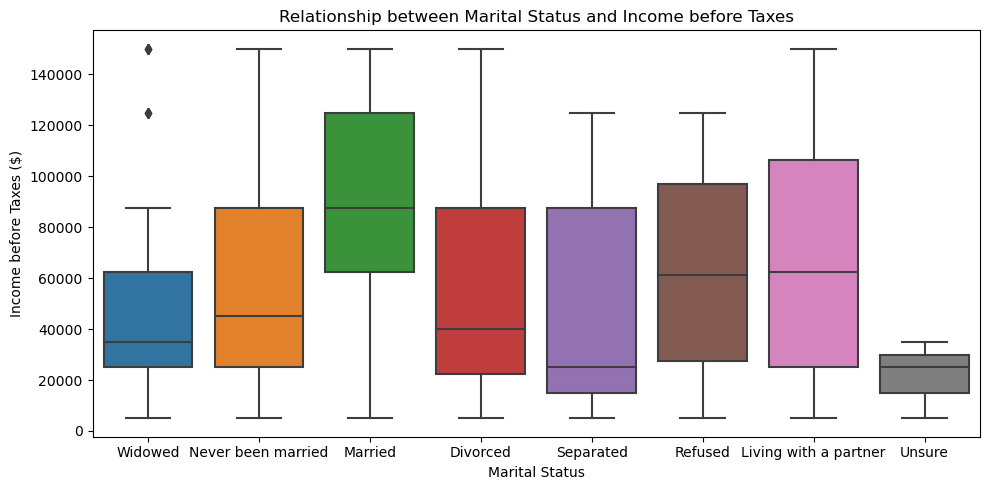

In [36]:
# Need to translate from human-readable form to integer for boxplot
# Take median of each group as value
income_mapping = {'<$10,000': 5000, 'Between $10,000 & $20,000': 15000,'Between $20,000 & $30,000':25000, 
                  'Between $30,000 & $40,000': 35000, 'Between $40,000 & $50,000': 45000, 
                  'Between $50,000 & $75,000': 62500, 'Between $75,000 & $100,000': 87500, 
                  'Between $100,000 & $150,000': 125000, '>$150,000': 150000}

# Convert 
cts_data_numeric_income = cts_data[['race', 'marital_status', 'income_before_taxes']]
cts_data_numeric_income['income_before_taxes'] = cts_data_numeric_income['income_before_taxes'].map(income_mapping)

# Create a boxplot to visualize the relationship between marital status and income
plt.figure(figsize=(10, 5))
sns.boxplot(x='marital_status', y='income_before_taxes', data=cts_data_numeric_income)

# Customize the plot
plt.xlabel('Marital Status')
plt.ylabel('Income before Taxes ($)')
plt.title('Relationship between Marital Status and Income before Taxes')

# Display the plot
plt.tight_layout()
plt.show()

As shown, married couples tend to have more income compared to all the other people in different marital statuses.

Now let's look into whether there are significant differences in income by race.

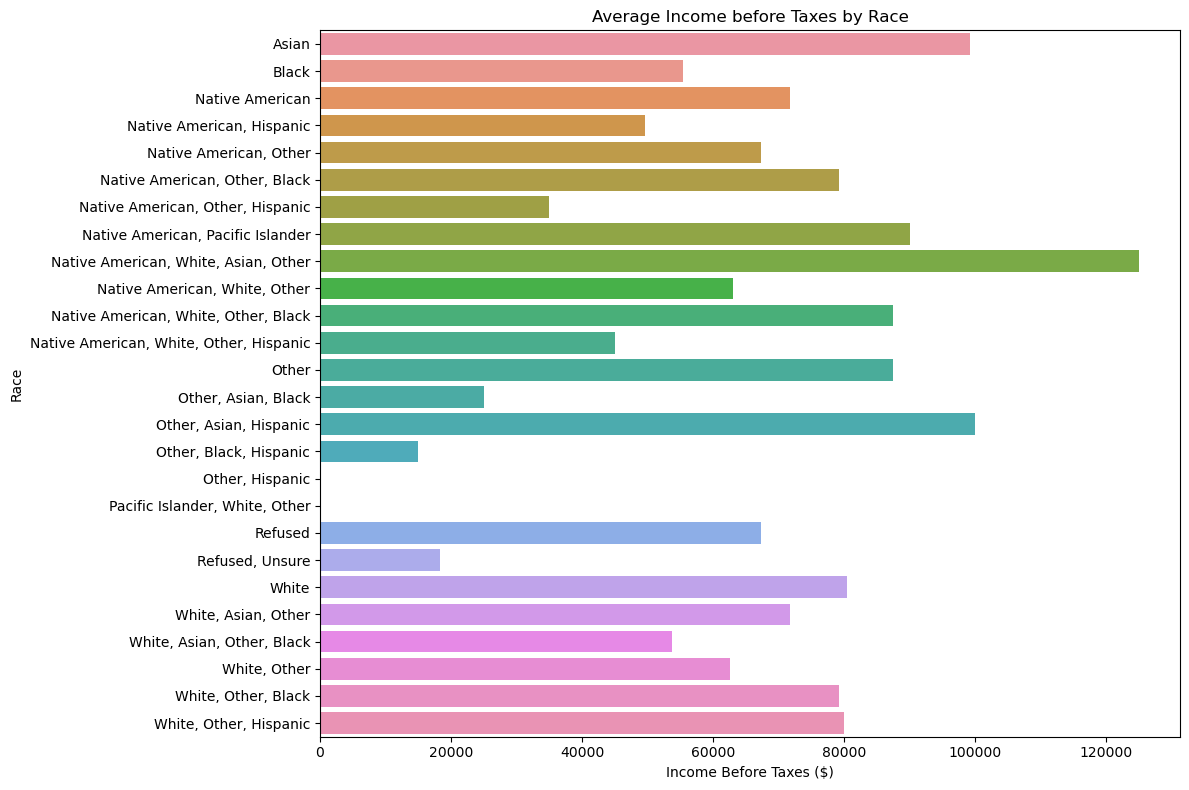

In [37]:
# Group the data by race and calculate the mean income before taxes for each category
race_income = cts_data_numeric_income.groupby('race')['income_before_taxes'].mean()

# Create a bar plot to visualize the relationship between race and income
plt.figure(figsize=(12, 8))
sns.barplot(x=race_income.values, y=race_income.index, orient='h')

# Customize the plot
plt.xlabel('Income Before Taxes ($)')
plt.ylabel('Race')
plt.title('Average Income before Taxes by Race')

# Display the plot
plt.tight_layout()
plt.show()

Because of the way survey answers were provided, when a person is of multiple races their races are listed on one line. For the sake of simplicity, our below conclusions will only consider columns with one race listed (with multiple races, attribution becomes too nuanced to determine).

From the graph, we can see that the Asian population tend to have the greatest income, earning 100,000 on average. Meanwhile, White, Native American, and Black populations earn 80,000, 70,000 and 60,000 on average, respectively. 

From analysis in 4.2, it was clear that those financially strained were less likely to have internet and/or TV at home. With the above information, we can assume that an individual's race would restrict their access to these technologies.

Now, let's investigate if there's any links between education and gender.

<Figure size 1500x1200 with 0 Axes>

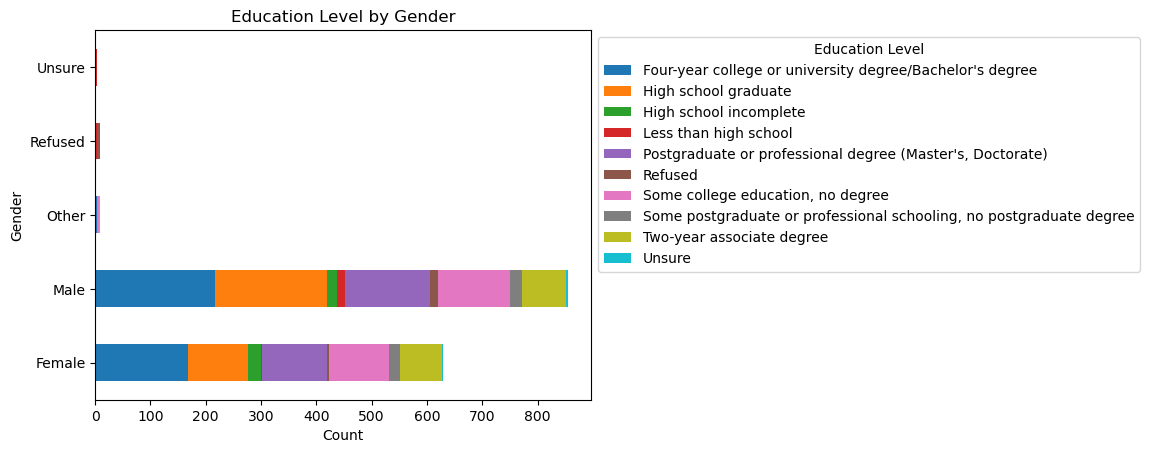

In [38]:
# Get count of education status by gender
education_counts = cts_data.groupby('gender')['highest_level_of_schooling_completed'].value_counts().unstack()

# Plot a stacked bar chart
plt.figure(figsize=(15, 12))
education_counts.plot(kind='barh', stacked=True)
plt.ylabel('Gender')
plt.xlabel('Count')
plt.title('Education Level by Gender')
plt.legend(title="Education Level", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

48.72611464968153

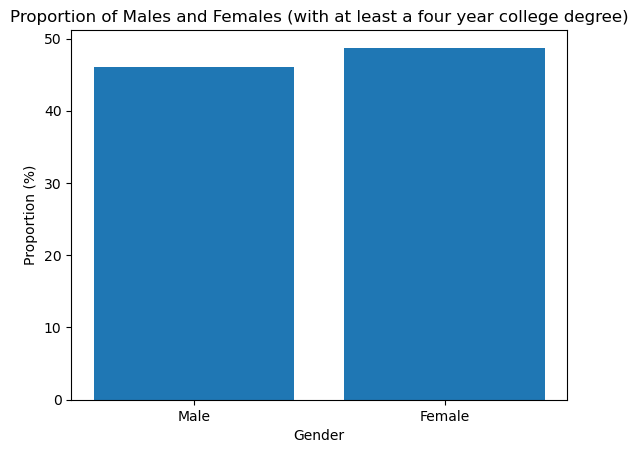

In [39]:
# We will need this reverse mapping mapping for filtering purposes
education_mapping = {
    'Less than high school': 0,
    'High school incomplete': 1,
    'High school graduate': 2,
    'Some college education, no degree': 3,
    'Two-year associate degree': 4,
    "Four-year college or university degree/Bachelor's degree": 5,
    'Some postgraduate or professional schooling, no postgraduate degree': 6,
    "Postgraduate or professional degree (Master's, Doctorate)": 7
}

# Convert 
cts_data_numeric_education = cts_data[[ 'gender', 'highest_level_of_schooling_completed']]
cts_data_numeric_education['highest_level_of_schooling_completed'] = cts_data_numeric_education['highest_level_of_schooling_completed'].map(education_mapping)

# Filter the data to get only four year college degree or higher
edu_four_year_college_or_higher = cts_data_numeric_education[cts_data_numeric_education['highest_level_of_schooling_completed']>=5]
# Calculate the count of males and females in this group
male_count = edu_four_year_college_or_higher[edu_four_year_college_or_higher['gender'] == 'Male'].shape[0]
female_count = edu_four_year_college_or_higher[edu_four_year_college_or_higher['gender'] == 'Female'].shape[0]

# Calculate the proportions
total_counts = cts_data.groupby('gender').size()
male_proportion = (male_count / total_counts['Male'])*100
female_proportion = (female_count / total_counts['Female'])*100
display(female_proportion)
# Plot the proportions
labels = ['Male', 'Female']
proportions = [male_proportion, female_proportion]

plt.bar(labels, proportions)
plt.xlabel('Gender')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Males and Females (with at least a four year college degree)')

plt.show()


From the survey, approximately 46% of males and 48% of females have a four year college degree or higher. This is very well balanced and the proportions are surprisingly high for both genders (almost half the total sample), indicating a well educated population.

Analysis in 4.2 showed that the more educated you are, the more likely you can afford access to the internet and TV. Hence, there wouldn't be signficant differences in technology access between men and women based on their education.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>5. Results/Insights</h1>

Many useful results were obtained throughout our analysis. In Section 4.1, we found that social media users make significant use of these platforms, being most likely to access sites at least once a day and using 3 to 4 platforms on average. While there were no major differences with social media usage between genders, it was clear that younger people were more likely to use them – but those of retired age (and those not employed full-time) also made significant use of these platforms. Interestingly, those with low and very high incomes use social media the most.

In Section 4.2, we found that lack of access to internet services at home and TV was primarily due to expensive costs and availability of alternative access options (such as mobile networks for home internet, and online alternatives for TV). Very few people (17 out of 1500) expressed disinterest in having a home internet subscription. Approximately 10% of responders found internet costs to be too expensive, which is a surprisingly high number. We found that these 10% are predominantly young, single people with low incomes who live on their own.

For Section 4.3, we determined that income was significantly influenced by both race and marital status; those who are married and are of Asian ethnicity earn the most. All other marital statuses earn significantly less, and minorities tend to have reduced income as well. These financial implications mean minorities who aren’t married are more likely to have difficulty paying for technology and internet services at home.

Regarding the ultimate goal of this report, if we wish to promote equal access to technology among all people, the best way to do that would be to financially assist those 10% (identified in Section 4.2) with low incomes who are young and live alone.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>6. In hindsight...</h1>

The most challenging aspect of our analysis was handling side-effects produced on the main dataset (for example, if a new column was appended to it). As each part was completed independently before merging, any side-effects would significantly impact others’ analysis. Our solution to this problem was to identify the source of the side-effect and replace it with a variable independent of the main dataset. While simple, finding the source was often difficult.

Using standard dictionaries and utility functions significantly reduced the volume of code required to complete complex tasks. Making these utility functions as flexible as possible maximised our ability to reuse code in as many places as possible.

The study also successfully achieved the project’s goals. We managed to identify numerous links between personal characteristics and technology usage. It was particularly interesting how widespread and intense social media usage is across the population. Also, lack of internet access at home was more prominent than expected.

If we had the chance to redo this notebook (perhaps for future analysis), it would be worth delving deeper into personal characteristics to find nuanced and stronger links to technology use. It would also be beneficial to construct additional graphs and statistics based on proportions instead of counts, as they provide a clearer representation of the population as a whole.
